In [45]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


In [46]:
df=pd.read_csv("bhp.csv")

In [47]:
df.shape[0]

13200

(array([1.66619869e-06, 2.52530871e-10, 0.00000000e+00, 1.26265436e-10,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.26265436e-10]),
 array([2.67000000e+02, 6.00253650e+05, 1.20024030e+06, 1.80022695e+06,
        2.40021360e+06, 3.00020025e+06, 3.60018690e+06, 4.20017355e+06,
        4.80016020e+06, 5.40014685e+06, 6.00013350e+06, 6.60012015e+06,
        7.20010680e+06, 7.80009345e+06, 8.40008010e+06, 9.00006675e+06,
        9.60005340e+06, 1.02000401e+07, 1.08000267e+07, 1.14000133e+07,
        1.20000000e+07]),
 <BarContainer object of 20 artists>)

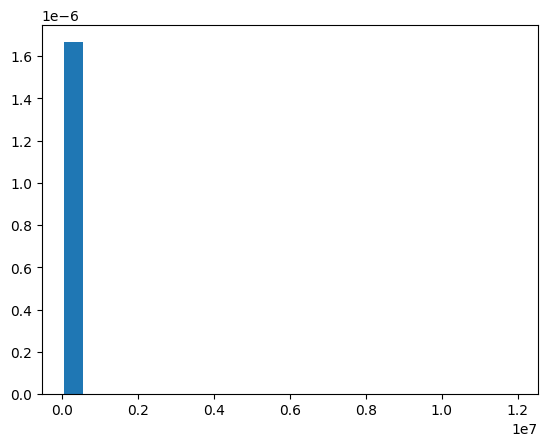

In [48]:
plt.hist(df.price_per_sqft,bins=20,density=True,rwidth=0.8)

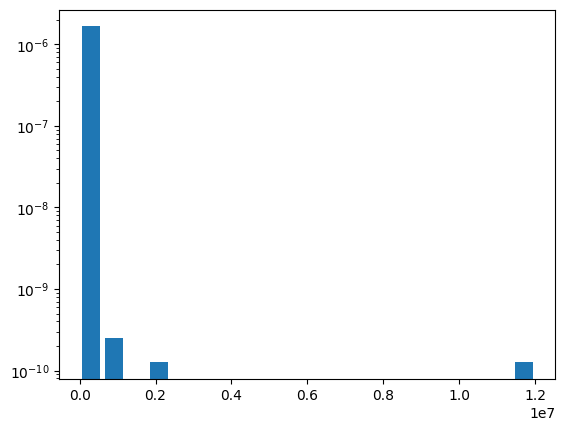

In [49]:
plt.hist(df.price_per_sqft,bins=20,density=True,rwidth=0.8)
plt.yscale("log")

In [50]:
min_threshold,max_threshold=df.price_per_sqft.quantile([0.01,0.999])

In [51]:
df2=df[(df.price_per_sqft<max_threshold)& (df.price_per_sqft>min_threshold)]

In [52]:
df2.shape[0]

13050

(array([1.62910797e-04, 1.50438390e-04, 4.54970322e-05, 2.13217241e-05,
        1.34984148e-05, 1.04845169e-05, 5.03385064e-06, 3.97578012e-06,
        1.63519989e-06, 1.09013326e-06, 1.05807052e-06, 5.13003887e-07,
        3.84752915e-07, 2.24439201e-07, 9.61882288e-08, 3.20627429e-08,
        0.00000000e+00, 6.41254859e-08, 3.20627429e-08, 1.28250972e-07]),
 array([ 2550.  ,  4939.95,  7329.9 ,  9719.85, 12109.8 , 14499.75,
        16889.7 , 19279.65, 21669.6 , 24059.55, 26449.5 , 28839.45,
        31229.4 , 33619.35, 36009.3 , 38399.25, 40789.2 , 43179.15,
        45569.1 , 47959.05, 50349.  ]),
 <BarContainer object of 20 artists>)

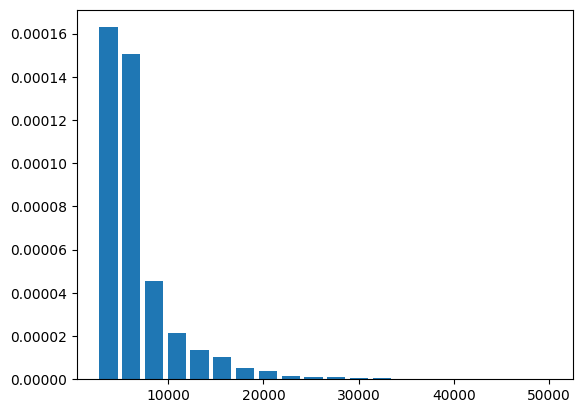

In [53]:
plt.hist(df2.price_per_sqft,bins=20,density=True,rwidth=0.8)


In [54]:
Uper_quaartile=df2.price_per_sqft.mean()+(4*df2.price_per_sqft.std())

In [55]:
lower_quaartile=df2.price_per_sqft.mean()-(4*df2.price_per_sqft.std())

In [56]:
df2_4th_quartile=df2[(df2.price_per_sqft>lower_quaartile) & (df2.price_per_sqft<Uper_quaartile) ]

In [57]:
df2_4th_quartile.shape

(12925, 7)

#Using Z score

In [67]:
df["Z_score"]=(df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()

In [68]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [80]:
df_z_score=df[(df.Z_score<-4) | (df.Z_score>4) ]


In [81]:
df_z_score

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067


In [84]:
df4 = df[(df.Z_score>-4)&(df.Z_score<4)]

In [85]:
df4.shape

(13196, 8)

In [86]:
df.shape[0]-df2.shape[0]

150